In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data file
df_ready = pd.read_pickle(r'C:\Users\Pakshil Jani\Desktop\career foundry\Chapter-4 Python\Instacart project analysis\Data\Prepared Data\df_ready.pkl')

In [3]:
df_ready.head(3)

,order_id,product_id,product_name,prices,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1107,1,Chocolate Sandwich Cookies,5.8,snacks,38259,2,1,11,7.0
1,1107,46149,Zero Calorie Cola,13.4,beverages,38259,2,1,11,7.0
2,1107,9434,Bag of Large Lemons,8.3,frozen,38259,2,1,11,7.0


In [4]:
df_ready.shape

(32399732, 10)

In [5]:
# Creating a new column to identify maximum orders by each customer
df_ready['max_order'] = df_ready.groupby(['user_id'])['order_number'].transform(np.max)

In [6]:
df_ready.head(3)

,order_id,product_id,product_name,prices,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,max_order
0,1107,1,Chocolate Sandwich Cookies,5.8,snacks,38259,2,1,11,7.0,4
1,1107,46149,Zero Calorie Cola,13.4,beverages,38259,2,1,11,7.0,4
2,1107,9434,Bag of Large Lemons,8.3,frozen,38259,2,1,11,7.0,4


,order_number
,mean
department,
alcohol,15.215751
babies,19.310397
bakery,17.170395
beverages,17.225802
breakfast,16.773669
bulk,20.197148
canned goods,16.165037
dairy eggs,17.667853


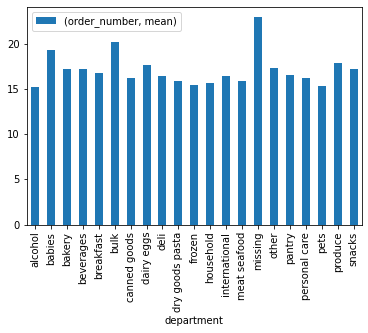

In [7]:
# Which is the most andleast popular department in Instacart in terms of order volume?
df_ready.groupby('department').agg({'order_number':['mean']}).plot.bar()
plt.legend()
df_ready.groupby('department').agg({'order_number':['mean']})

In [8]:
df_ready.groupby('product_name').agg({'prices':['mean'],'order_number':['mean']})

,prices,order_number
,mean,mean
product_name,,
#2 Coffee Filters,11.0,19.308880
#2 Cone White Coffee Filters,5.7,16.615385
#2 Mechanical Pencils,9.2,17.000000
#4 Natural Brown Coffee Filters,2.5,18.178423
#NAME?,3.6,12.586207
...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,5.4,33.513514
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,5.2,15.672727


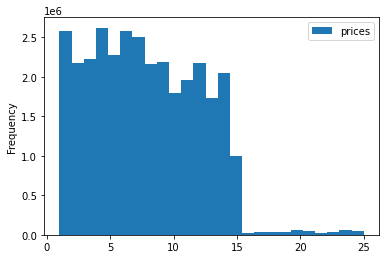

In [13]:
# Price range offered to customers
df_ready.prices.plot.hist(bins=25)
plt.legend()

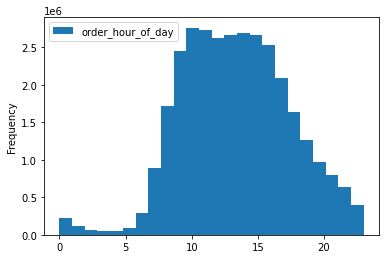

In [16]:
# Which are busiest hours for instacart? For staffing and app load, this is important factor...
df_ready.order_hour_of_day.plot.hist(bins=24)
plt.legend()

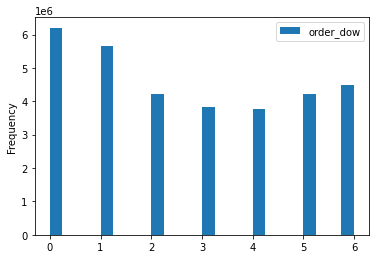

In [17]:
# Which days customers place most and least orders? For staffing and potential load sharing opportunities...
# 0=Saturday, 1=Sunday, 2=Monday, 3=Tuesday, 4=Wednesday, 5=Thursday, 6=Friday
df_ready.order_dow.plot.hist(bins=24)
plt.legend()

<AxesSubplot:>

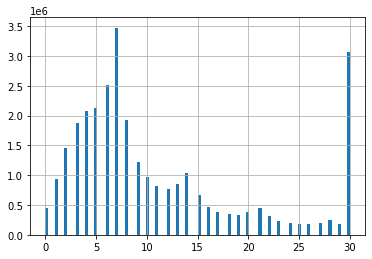

In [31]:
#How frequently customers place orders to instacart? Are there more repeat orders?
# From 0 days to 30 days and above
df_ready.days_since_prior_order.hist(bins=100)


In [42]:
df_ready.days_since_prior_order.value_counts().sort_index()
#3.4 million orders are within 7 days(Repeat orders) and 3.06 milliom orders are 30 days older(New customers)

0.0      448272
1.0      940331
2.0     1463521
3.0     1875906
4.0     2078317
5.0     2124150
6.0     2517165
7.0     3475708
8.0     1931662
9.0     1217643
10.0     967012
11.0     820626
12.0     774008
13.0     850986
14.0    1029483
15.0     671336
16.0     461237
17.0     382055
18.0     350528
19.0     334812
20.0     379671
21.0     444068
22.0     308798
23.0     225793
24.0     193385
25.0     180385
26.0     177744
27.0     204025
28.0     253114
29.0     175444
30.0    3066802
Name: days_since_prior_order, dtype: int64

In [44]:
# Classifying in to groups to identify loyal customers
df_ready.loc[df_ready['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df_ready.loc[(df_ready['max_order'] <= 40) & (df_ready['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df_ready.loc[df_ready['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

Regular customer    15874128
Loyal customer      10282763
New customer         6242841
Name: loyalty_flag, dtype: int64

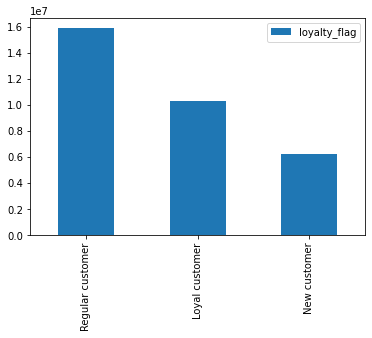

In [49]:
# What proportion of customers are new vs regular vs loyal for instacart?
df_ready.loyalty_flag.value_counts().plot.bar()
plt.legend()
df_ready.loyalty_flag.value_counts()

,prices,order_number
,mean,mean
loyalty_flag,,
Loyal customer,7.773575,32.641215
New customer,7.801206,3.807035
Regular customer,7.798262,12.347571


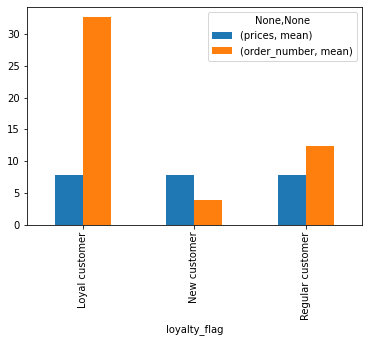

In [54]:
# Customers with different loyalty flag vs prices
df_ready.groupby(['loyalty_flag']).agg({'prices':['mean'],'order_number':['mean']}).plot.bar()
df_ready.groupby(['loyalty_flag']).agg({'prices':['mean'],'order_number':['mean']})

In [56]:
# pricing pattern for customers with mean,min and max prices
df_ready.groupby(['user_id']).agg({'prices':['max','min','mean']}).head(10)

prices               
           max  min      mean
user_id                      
1         14.0  1.0  6.367797
2         14.8  1.3  7.515897
3         14.4  1.3  8.197727
4         14.6  1.4  8.205556
5         14.8  3.2  9.189189
6         19.6  1.8  8.471429
7         23.2  1.1  7.466990
8         14.4  1.1  8.781633
9         19.3  1.2  7.607895
10        24.2  1.0  8.651049

In [57]:
#Creating spending flag based on average price of items purchased by each customer
df_ready['spending_flag'] = df_ready.groupby(['user_id'])['prices'].transform(np.mean)

In [66]:
df_ready.head(3).sort_values('user_id')

,order_id,product_id,product_name,prices,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,max_order,loyalty_flag,spending_flag
0,1107,1,Chocolate Sandwich Cookies,5.8,snacks,38259,2,1,11,7.0,4,New customer,7.163333
1,1107,46149,Zero Calorie Cola,13.4,beverages,38259,2,1,11,7.0,4,New customer,7.163333
2,1107,9434,Bag of Large Lemons,8.3,frozen,38259,2,1,11,7.0,4,New customer,7.163333


In [59]:
df_ready.spending_flag.value_counts().sort_index()

1.000000     18
1.100000      7
1.100000     20
1.200000      8
1.262500      8
             ..
18.233333     9
19.400000     9
20.000000     3
20.114286     7
23.200000     3
Name: spending_flag, Length: 164624, dtype: int64

In [69]:
# Categorizing customers based on spending pattern as high or low spender
df_ready.loc[df_ready.spending_flag>10, 'spender_flag'] = 'high_spender'
df_ready.loc[df_ready.spending_flag<=10, 'spender_flag'] = 'low_spender'

In [70]:
df_ready.spender_flag.value_counts()

low_spender     32280154
high_spender      119578
Name: spender_flag, dtype: int64

In [76]:
# Comparing spender flag vs loyalty flag
cross_tab_spender=pd.crosstab(df_ready['spender_flag'],df_ready['loyalty_flag'],dropna=False)
cross_tab_spender


loyalty_flag,Loyal customer,New customer,Regular customer
spender_flag,,,
high_spender,13895,58502,47181
low_spender,10268868,6184339,15826947


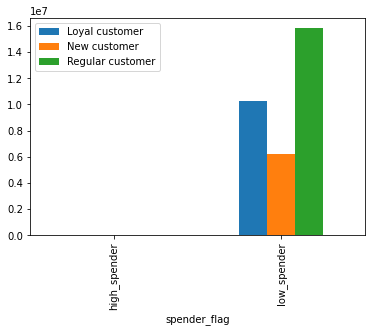

In [78]:
cross_tab_spender.plot.bar()
plt.legend()

In [80]:
cross_tab_spender_time=pd.crosstab(df_ready['spender_flag'],df_ready['order_hour_of_day'],dropna=False)
cross_tab_spender_time

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
spender_flag,,,,,,,,,,,,,,,,,,,,,
high_spender,1092,471,383,237,249,324,932,3263,5607,8185,...,9621,9968,9238,8291,6870,5551,3742,2649,1714,1353
low_spender,217650,115212,68977,51031,52983,87620,289518,887660,1712256,2445657,...,2679107,2651750,2525506,2078982,1629356,1252525,972258,792879,632445,400919


In [101]:
# Getting to know more about high spender customers
df_high_spender = df_ready[df_ready['spender_flag']=='high_spender']

In [102]:
df_high_spender.head()

,order_id,product_id,product_name,prices,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,max_order,loyalty_flag,spending_flag,spender_flag
2839,528251,1,Chocolate Sandwich Cookies,5.8,snacks,161636,27,1,17,9.0,36,Regular customer,10.553333,high_spender
2840,528251,34518,Diet Lemon-Lime Soda,10.9,beverages,161636,27,1,17,9.0,36,Regular customer,10.553333,high_spender
2841,528251,2065,Carb Smart Chocolate Ice Cream,1.8,frozen,161636,27,1,17,9.0,36,Regular customer,10.553333,high_spender
2842,528251,7901,"Ice Pops Sugar Free, Orange, Cherry, Grape",13.5,frozen,161636,27,1,17,9.0,36,Regular customer,10.553333,high_spender
2843,528251,41802,Sugar Free Real Desserts Gelatin Snacks,9.3,dairy eggs,161636,27,1,17,9.0,36,Regular customer,10.553333,high_spender


<AxesSubplot:xlabel='order_hour_of_day', ylabel='prices'>

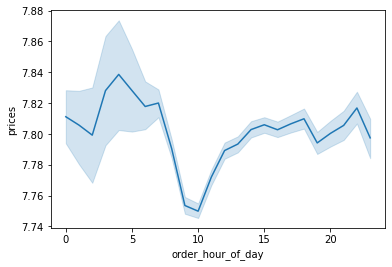

In [105]:
# Is there a period of time when high priced items are bought so Instacart can maintain inventory accordingly?
sns.lineplot(data=df_ready,x='order_hour_of_day',y='prices')

In [ ]:
df_high_spender.plot.bar(x='order-hour-of-day',y='spender_flag')

In [ ]:
sns.lineplot(data=df_high_spender,x='order_hour_of_day',y='prices')

In [ ]:
df_ready.to_pickle(r'C:\Users\Pakshil Jani\Desktop\career foundry\Chapter-4 Python\Instacart project analysis\Data\Prepared Data\df_ready_analyzed.pkl')

# More analysis coming in the next notebook